<h1>Bank Marketing Deposit Subscription with Random Forest Classification
 Model</h1>


## Importing libraries


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [74]:
dataset = pd.read_csv('bank_marketing.csv')
dataset.head()

age          job  marital  ... past_contacts previous_outcome  deposit_subscribed
0   30   unemployed  married  ...             0          unknown                  no
1   33     services  married  ...             4          failure                  no
2   35   management   single  ...             1          failure                  no
3   30   management  married  ...             0          unknown                  no
4   59  blue-collar  married  ...             0          unknown                  no

[5 rows x 13 columns]

## Checking Missing Values 

In [75]:
print(len(dataset.columns))

13


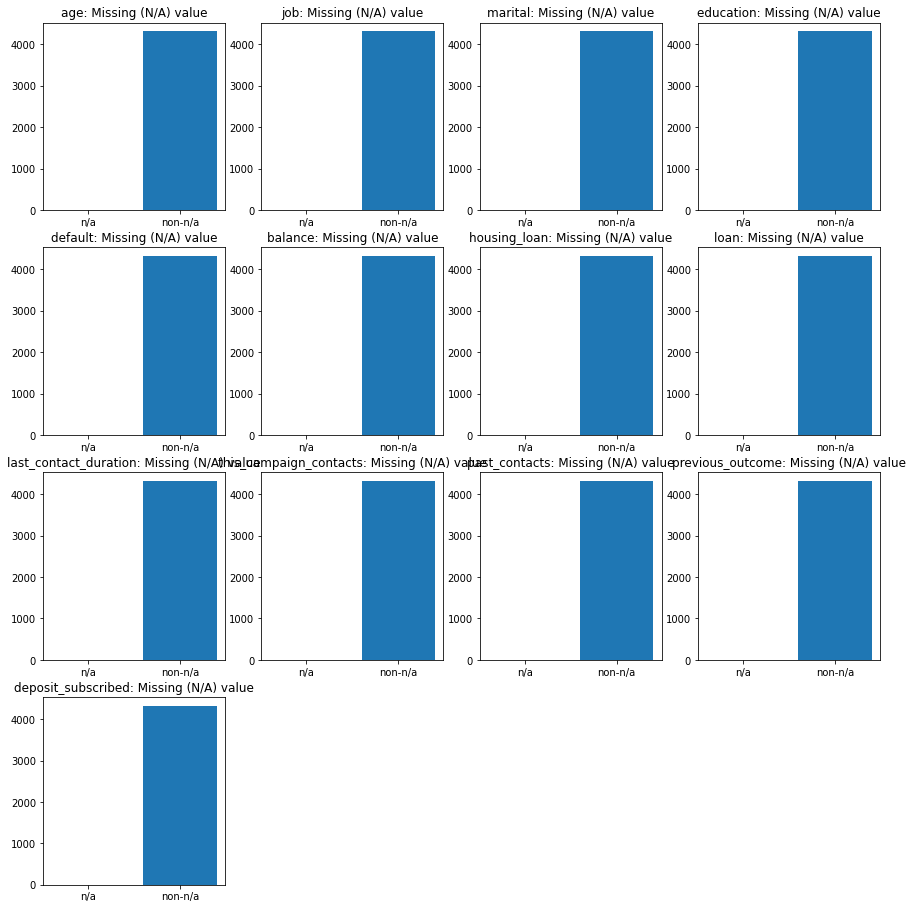

In [76]:
plt.figure(figsize = (15, 20))
isnull = dataset.isnull()
cols = dataset.columns
x_isnull = ['n/a', 'non-n/a']
num_features = len(cols)
for i in range(1, num_features + 1):
    plt.subplot(5, 4, i)
    column_isnull = isnull.iloc[:, i - 1].values
    num_null = column_isnull.tolist().count(True)
    num_nonnull = column_isnull.tolist().count(False)
    null_count = [num_null, num_nonnull]
    plt.bar(x_isnull, null_count)
    plt.title(cols[i - 1]+': Missing (N/A) value')
plt.show()

## Separating into independent variables and dependent variable

In [77]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Distribution of the dependent variable

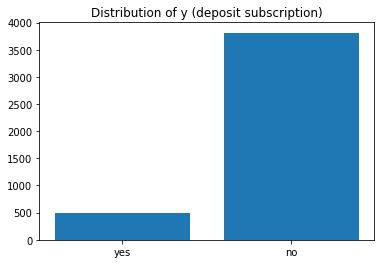

In [78]:

plt.bar(["yes", "no"], [y.tolist().count("yes"), y.tolist().count("no")])
plt.title('Distribution of y (deposit subscription)')
plt.show()

# Encoding Categorical Data

## Encoding binary variables

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["no", "yes"])
binary_cols = [4,6,7]
print(le.classes_)
for col in binary_cols:
  X[:, col] = le.transform(X[:, col])
y = le.transform(y)

['no' 'yes']


## Encoding non-binary categorical variables

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2, 3, 11])], remainder = 'passthrough')
X = ct.fit_transform(X)



In [81]:
print(X[0, :])

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0
 0.0 0.0 1.0 30 0 1787 0 0 79 1 0]


## Splitting the dataset into the training set and the test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
print(X_train)


[[0.0 0.0 0.0 ... 563 1 0]
 [0.0 0.0 1.0 ... 211 3 0]
 [0.0 1.0 0.0 ... 88 4 0]
 ...
 [1.0 0.0 0.0 ... 221 1 1]
 [0.0 0.0 0.0 ... 110 2 0]
 [0.0 0.0 0.0 ... 162 3 0]]


In [84]:
print(X_test)

[[0.0 1.0 0.0 ... 11 1 0]
 [1.0 0.0 0.0 ... 219 1 0]
 [0.0 0.0 0.0 ... 218 1 0]
 ...
 [0.0 0.0 0.0 ... 699 2 1]
 [0.0 0.0 0.0 ... 185 4 0]
 [0.0 0.0 0.0 ... 123 1 0]]


In [85]:
print(y_train)

[1 0 0 ... 1 0 0]


In [86]:
print(y_test)

[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 

## Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train_kpca = X_train
X_test_kpca = X_test

## Training the dataset with Random Forest  on the training set

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the test result

In [89]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating the result

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("RESULTS with Original Dataset")
print(confusion_matrix(y_test, y_pred))
print("Accuracy : {:.5}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred)))
print("Recall   : {:.5}".format(recall_score(y_test, y_pred)))
print("F1 score : {:.5}".format(f1_score(y_test, y_pred)))

RESULTS with Original Dataset
[[752  15]
 [ 76  20]]
Accuracy : 0.89455
Precision: 0.57143
Recall   : 0.20833
F1 score : 0.30534


## Feature Selection by feature importance

Plotting feature importance

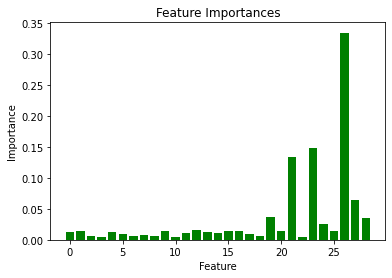

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
clf.fit(X, y)
f_importances = clf.feature_importances_

plt.bar([x for x in range(len(f_importances))], f_importances, color = 'green')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


 Remove the features that have an importance less than threshold

In [92]:
threshold = 0.10
optimal_index = [i for i in range(len(f_importances)) if f_importances[i] > threshold]
X_train_opt = X_train[:, optimal_index]
X_test_opt = X_test[:, optimal_index]
print(optimal_index)

[21, 23, 26]


## Training the dataset with Random Forest  on the training set (optimal dataset)

In [93]:
classifier_opt = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier_opt.fit(X_train_opt, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the test result (optimal dataset)

In [94]:
y_pred_opt = classifier_opt.predict(X_test_opt)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_opt.reshape(len(y_pred_opt), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating the result (optimal)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("RESULTS with Optimal Dataset")
print(confusion_matrix(y_test, y_pred_opt))
print("Accuracy : {:.5}".format(accuracy_score(y_test, y_pred_opt)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred_opt)))
print("Recall   : {:.5}".format(recall_score(y_test, y_pred_opt)))
print("F1 score : {:.5}".format(f1_score(y_test, y_pred_opt)))

RESULTS with Optimal Dataset
[[741  26]
 [ 69  27]]
Accuracy : 0.88992
Precision: 0.50943
Recall   : 0.28125
F1 score : 0.36242


# Applying PCA (Principal Component Analysis) 

## PCA Scree Plot

In [96]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)
X_train_pca = pca.fit_transform(X_train_opt)
X_test_pca = pca.transform(X_test_opt)

<generator object <genexpr> at 0x7ff76e5efa40>


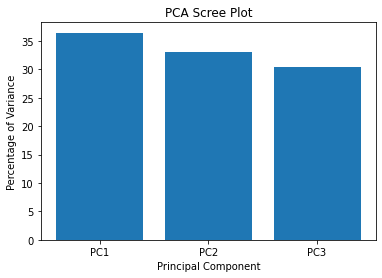

In [97]:
variance_percentage = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
print("Variance % {:.2}:"+variance_percentage[i]+"\n" for i in range(len(variance_percentage)))
columns = ["PC"+str(i) for i in range(1, len(optimal_index)+1)]
plt.bar(x = range(0, len(optimal_index)), height = variance_percentage, tick_label = columns)
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance')
plt.show()

## Applying PCA for two variables

In [98]:
pca = PCA(n_components = 2, random_state = 0)
X_train_pca = pca.fit_transform(X_train_opt)
X_test_pca = pca.transform(X_test_opt)

## Training the dataset with logistic regression on the training set(PCA)

In [99]:
classifier_pca = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_depth = 6, max_features = 'sqrt', min_samples_split = 2, random_state = 0)
classifier_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the test result (PCA)

In [100]:
y_pred_pca = classifier_pca.predict(X_test_pca)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_pca.reshape(len(y_pred_pca), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating the result (PCA)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("RESULTS with PCA")
print(confusion_matrix(y_test, y_pred_pca))
print("Accuracy for training set : {:.5}".format(accuracy_score(y_train, classifier_pca.predict(X_train_pca))))
print("Accuracy : {:.5}".format(accuracy_score(y_test, y_pred_pca)))
print("Precision: {:.5}".format(precision_score(y_test, y_pred_pca)))
print("Recall   : {:.5}".format(recall_score(y_test, y_pred_pca)))
print("F1 score : {:.5}".format(f1_score(y_test, y_pred_pca)))

RESULTS with PCA
[[750  17]
 [ 78  18]]
Accuracy for training set : 0.90458
Accuracy : 0.88992
Precision: 0.51429
Recall   : 0.1875
F1 score : 0.27481


## Applying K-Fold Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_pca, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy {:.2} %".format(accuracies.mean()*100))
print("Standard Deviation {:.2} %".format(accuracies.std()*100))


Accuracy 8.9e+01 %
Standard Deviation 0.55 %


## Applying Grid Search to find the best hyperparameters

In [103]:
from sklearn.model_selection import GridSearchCV
parameters = {
                'n_estimators' : [700, 1000, 1300],
                'max_depth': [4, 6, 9],
                'min_samples_split': [2, 4, 6],
                'max_features': ['sqrt', 'log2']
              }
grid_search = GridSearchCV(estimator = classifier_pca,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train_pca, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy {:.2} %".format(best_accuracy*100))
print("Best Parameters", best_parameters)


Best Accuracy 8.9e+01 %
Best Parameters {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}


## Visualizing the trainig set result (PCA)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


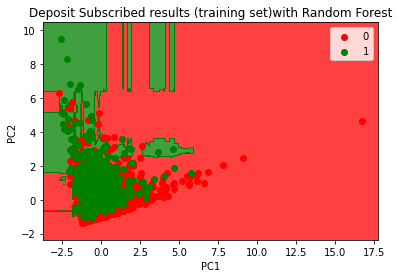

In [104]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Deposit Subscribed results (training set)with Random Forest')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualizing the test result (PCA)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


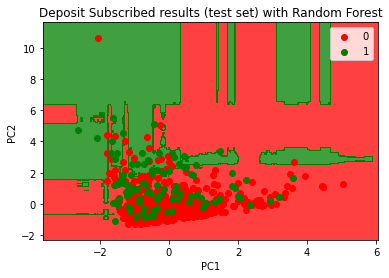

In [105]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Deposit Subscribed results (test set) with Random Forest')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()